<a href="https://colab.research.google.com/github/atharvv8/Exploratory-Data-Analysis-of-Titanic-Dataset/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Dataset**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url='https://raw.githubusercontent.com/atharvv8/Exploratory-Data-Analysis-of-Titanic-Dataset/main/titanic_train.csv'
df=pd.read_csv(url)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

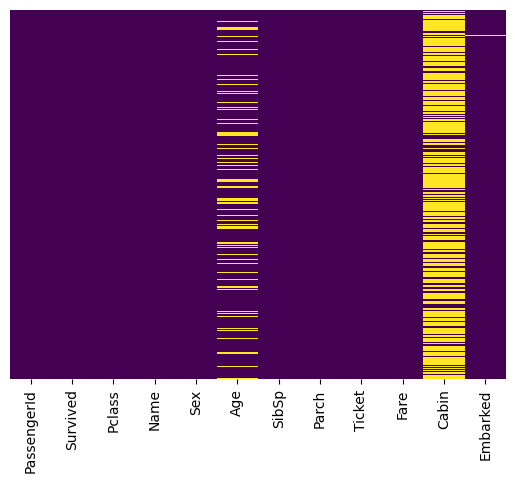

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

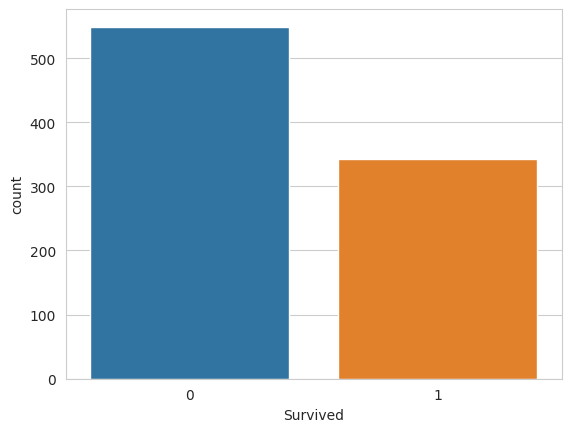

In [12]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='Survived')
# 0 means did not survived
# 1 means survived

<Axes: xlabel='Survived', ylabel='count'>

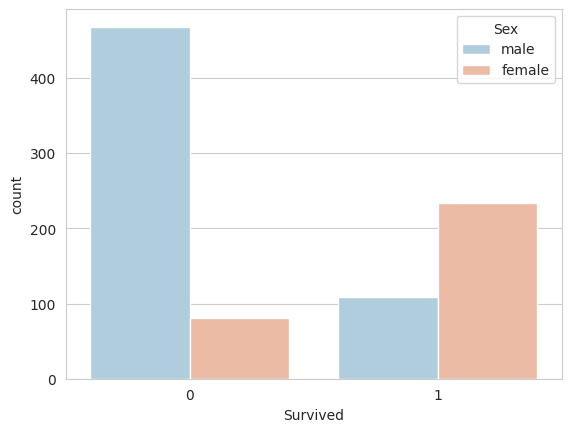

In [13]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='Survived',hue='Sex',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

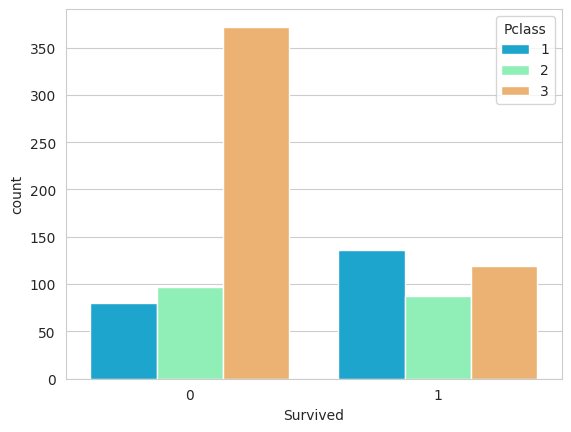

In [14]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='Survived',hue='Pclass',palette='rainbow')

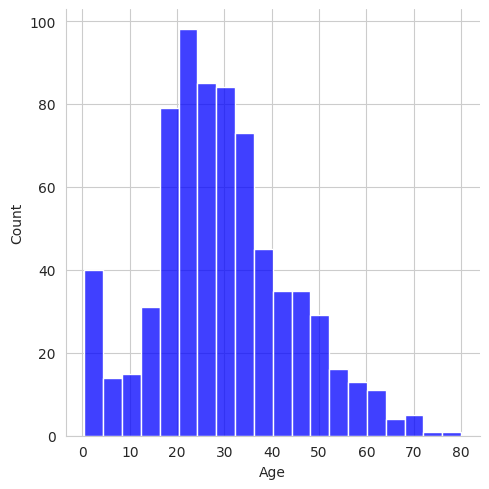

In [17]:
sns.displot(df['Age'].dropna(),kde=False,color='blue')

<Axes: xlabel='Age', ylabel='Count'>

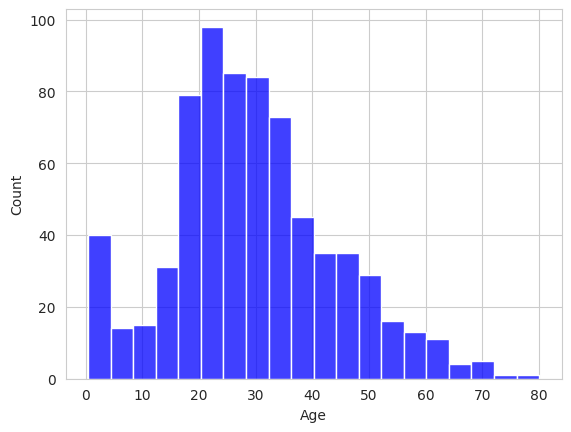

In [18]:
sns.histplot(df['Age'].dropna(),kde=False,color='blue')

<Axes: xlabel='SibSp', ylabel='count'>

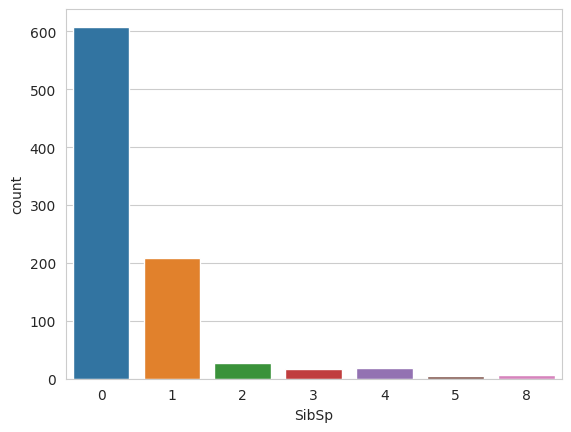

In [19]:
sns.countplot(x='SibSp',data=df)# Sibling and spouse count

<Axes: xlabel='Pclass', ylabel='Age'>

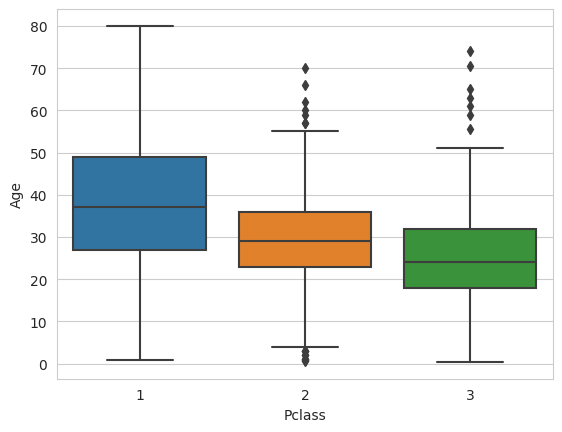

In [20]:
sns.boxplot(x='Pclass',y='Age',data=df)#We Can get an idea of average age of passengers in each Class

In [21]:
#We can see from the above graph that average age for
# Passenger class 1 = 38
# Passenger class 2 = 29
# Passenger class 3 = 24
def impute_Age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 38
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age


In [23]:
df['Age']=df[['Age','Pclass']].apply(impute_Age,axis=1)

<Axes: >

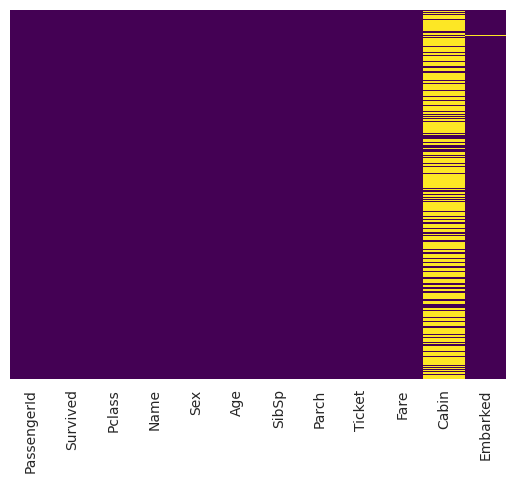

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [25]:
df.drop('Cabin',axis=1,inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
